# Data preparation

In [1]:
from sklearn.experimental import enable_iterative_imputer
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import CFS
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import functions
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data = []
with open('data/chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        line = line.replace('\t', '')
        data.append(line.split(','))

names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class']

df = pd.DataFrame(data[145:], columns=names)
for c in df.columns:
    df.loc[df[c] == '?', c] = np.nan
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [3]:
df.isnull().sum()


age        9
bp        12
sg        47
al        46
su        49
rbc      151
pc        65
pcc        4
ba         4
bgr       43
bu        19
sc        17
sod       85
pot       86
hemo      52
pcv       71
wbcc     106
rbcc     129
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

## Encode the data

In [4]:
cat_feat = ["rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","class"]
num_feat = {var: df[var] for var in df if var not in cat_feat}
for var in ["rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","class"]:
    df[var].fillna(df[var].mode()[0],inplace=True)
for var in num_feat:
    df[var].fillna(df[var].median(),inplace=True)
num_feat

{'age': 0      48
 1      51
 2      60
 3      68
 4      24
        ..
 392    55
 393    42
 394    12
 395    17
 396    58
 Name: age, Length: 397, dtype: object,
 'bp': 0        80
 1        80
 2        90
 3        70
 4      80.0
        ... 
 392      80
 393      70
 394      80
 395      60
 396      80
 Name: bp, Length: 397, dtype: object,
 'sg': 0      1.020
 1      1.010
 2      1.015
 3      1.010
 4      1.015
        ...  
 392    1.020
 393    1.025
 394    1.020
 395    1.025
 396    1.025
 Name: sg, Length: 397, dtype: object,
 'al': 0      1
 1      2
 2      3
 3      0
 4      2
       ..
 392    0
 393    0
 394    0
 395    0
 396    0
 Name: al, Length: 397, dtype: object,
 'su': 0      0
 1      0
 2      0
 3      0
 4      4
       ..
 392    0
 393    0
 394    0
 395    0
 396    0
 Name: su, Length: 397, dtype: object,
 'bgr': 0      121
 1      106
 2       74
 3      100
 4      410
       ... 
 392    140
 393     75
 394    100
 395    114
 396    

In [5]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
2,60,90,1.015,3,0,normal,normal,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
3,68,70,1.010,0,0,normal,normal,notpresent,notpresent,100,...,36,8100.0,4.8,no,no,no,good,no,no,ckd
4,24,80.0,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


## Label Encoding

In [6]:
le = preprocessing.LabelEncoder()
df[cat_feat] = df[cat_feat].apply(le.fit_transform)
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [7]:
for var in num_feat:
    df[var] = pd.to_numeric(df[var])
df.dtypes


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc        int32
pc         int32
pcc        int32
ba         int32
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn        int32
dm         int32
cad        int32
appet      int32
pe         int32
ane        int32
class      int32
dtype: object

## Box plot

age        AxesSubplot(0.125,0.749828;0.133621x0.130172)
bp      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
sg       AxesSubplot(0.44569,0.749828;0.133621x0.130172)
al      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
su      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
bgr        AxesSubplot(0.125,0.593621;0.133621x0.130172)
bu      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
sc       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
sod     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
pot     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
hemo       AxesSubplot(0.125,0.437414;0.133621x0.130172)
pcv     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
wbcc     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
rbcc    AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

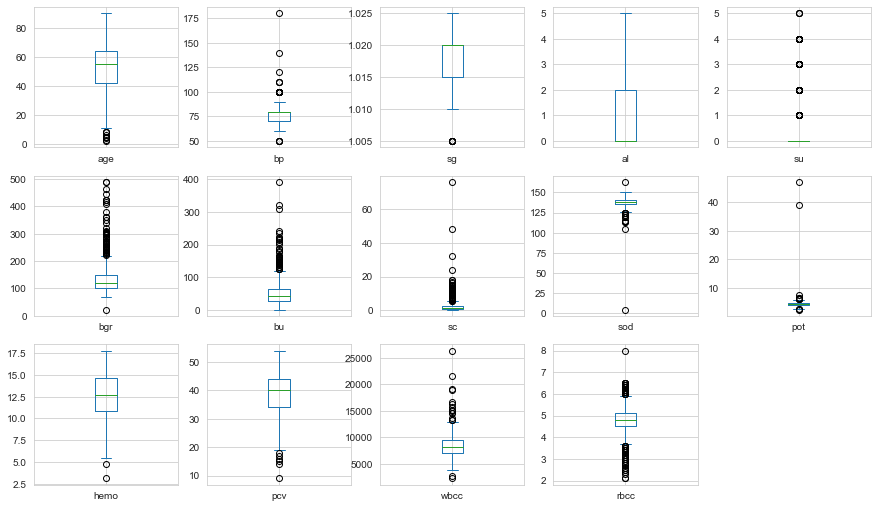

In [8]:
listToRemove = ["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "class"]
columnsName = df.columns
for var in listToRemove:
    columnsName = columnsName.drop(var)
plt.Figure(figsize=(10, 6))
df1=df.copy()
df1.drop(columns=listToRemove).plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15))

### => as you can see all quantitative feature have outliers

In [9]:
def outliers_imputation(df):
    listU = [2]
    listL = [2]
    while len(listL)>0 or len(listU)>0:
        outliers_bound_L = dict()
        outliers_bound_U = dict()
        ratio = dict()
        ratioU = dict()
        ratioL= dict()
        important_feature_modified = columnsName.copy()
        listU = []
        listL = []
        for val in important_feature_modified:
            price = df[val].describe()
            outliers_bound_U[val] = price.loc["75%"] + 1.5 * (price.loc["75%"] - price.loc["25%"])
            outliers_bound_L[val] = price.loc["25%"] - 1.5 * (price.loc["75%"] - price.loc["25%"])
            ratio[val] = (len(df[df[val] > outliers_bound_U[val]]) + len(df[df[val] < outliers_bound_L[val]]) / len(df[val]))
            ratioU[val] = (len(df[df[val] > outliers_bound_U[val]]) / len(df[val]))
            ratioL[val] = (len(df[df[val] < outliers_bound_L[val]]) / len(df[val]))
        for var in ratioU:
            if ratioU[var] > 0:
                listU.append(var)
        for var in ratioL:
            if ratioL[var] !=0:
                listL.append(var)
        for val in listU:
            df.loc[df[val] > outliers_bound_U[val], val] = np.nan
        for val in listL:
            df.loc[df[val] < outliers_bound_L[val], val] = np.nan
        multiple_imputer = IterativeImputer(random_state=42)
        df=pd.DataFrame(multiple_imputer.fit_transform(df), columns=df.columns)
    return df

In [10]:
num_cols=["age", "bp", "sg", "al", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc"]
functions.oultlier_ratio_calculation(df, num_cols)

{'age': 0.022670025188916875,
 'bp': 0.08816120906801007,
 'sg': 0.015113350125944584,
 'al': 0.0,
 'bgr': 0.1309823677581864,
 'bu': 0.09571788413098237,
 'sc': 0.13350125944584382,
 'sod': 0.042821158690176324,
 'pot': 0.0327455919395466,
 'hemo': 0.005037783375314861,
 'pcv': 0.015113350125944584,
 'wbcc': 0.042821158690176324,
 'rbcc': 0.1889168765743073}

### get the best K

#### It is important to note that outlier detection through a boxplot can only be used for initial insight as the outliers are detected assuming features are disconnected from each other.

In [11]:
df=outliers_imputation(df)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.000000,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.00000,...,44.0,7800.000000,5.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,51.000000,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.00000,...,35.0,8011.848438,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.000000,90.0,1.015,3.0,0.0,1.0,1.0,0.0,0.0,74.00000,...,39.0,7800.000000,4.400000,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,68.000000,70.0,1.010,0.0,0.0,1.0,1.0,0.0,0.0,100.00000,...,36.0,8100.000000,4.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.000000,80.0,1.015,2.0,0.0,1.0,0.0,0.0,0.0,112.54571,...,44.0,7928.579023,5.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55.000000,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.00000,...,47.0,7975.193107,4.900000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
393,42.000000,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.00000,...,54.0,7800.000000,5.276262,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,45.564384,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.00000,...,49.0,7900.177206,5.011064,0.0,0.0,0.0,0.0,0.0,0.0,1.0
395,17.000000,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.00000,...,51.0,7898.786249,5.167872,0.0,0.0,0.0,0.0,0.0,0.0,1.0


age        AxesSubplot(0.125,0.749828;0.133621x0.130172)
bp      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
sg       AxesSubplot(0.44569,0.749828;0.133621x0.130172)
al      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
su      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
bgr        AxesSubplot(0.125,0.593621;0.133621x0.130172)
bu      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
sc       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
sod     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
pot     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
hemo       AxesSubplot(0.125,0.437414;0.133621x0.130172)
pcv     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
wbcc     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
rbcc    AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

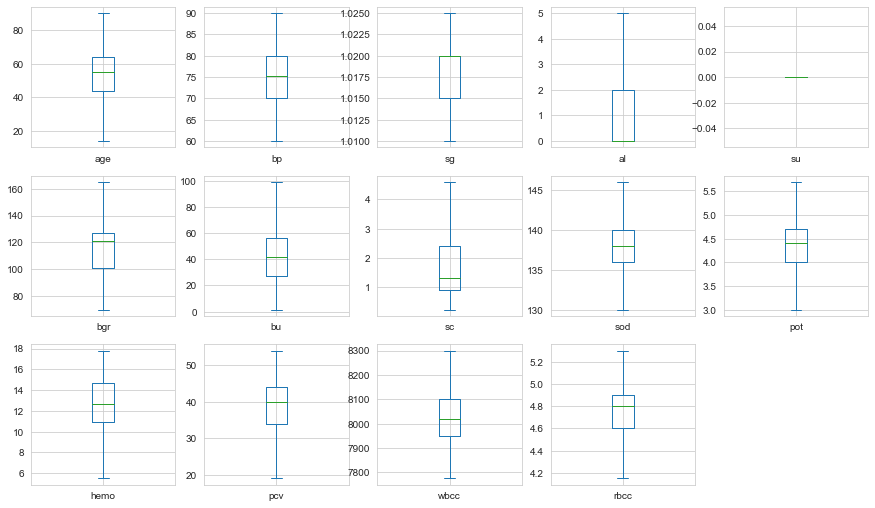

In [12]:
plt.Figure(figsize=(10, 6))
df1=df.copy()
df1.drop(columns=listToRemove).plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15))

## split the data

In [13]:
newdd = df.drop(columns=['su'])
X = newdd.drop(columns=['class'])
y = df['class']
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# X_train, X_test, y_train, y_test = kf.split(X, y)
scores = []
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((277, 23), (277,), (120, 23), (120,))

### Scalling the data

In [14]:
num_cols=["age", "bp", "sg", "al", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc"]
sc=StandardScaler()
# tmp=df["class"].copy()
X_train[num_cols]=sc.fit_transform(X_train[num_cols])
X_test[num_cols]=sc.fit_transform(X_test[num_cols])
X_train_df=pd.DataFrame(X_train, columns=X_train.columns)
X_test_df=pd.DataFrame(X_test, columns=X_test.columns)
X_train_df

,age,bp,sg,al,rbc,pc,pcc,ba,bgr,bu,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
258,-0.312133,0.561718,0.421746,-0.649906,1.0,1.0,0.0,0.0,0.307543,-0.614791,...,1.624258,0.201823,-0.702895,0.477571,0.0,0.0,0.0,0.0,0.0,0.0
211,0.979578,0.561718,-0.540959,-0.649906,1.0,0.0,0.0,0.0,0.107113,-0.706584,...,0.402353,0.454462,0.336540,1.601142,0.0,1.0,0.0,0.0,0.0,0.0
302,-0.856011,0.561718,0.421746,-0.649906,1.0,1.0,0.0,0.0,0.307543,-0.936065,...,1.661286,0.201823,-0.986169,1.601142,0.0,0.0,0.0,0.0,0.0,0.0
70,0.095776,0.259339,-0.540959,0.957451,0.0,0.0,0.0,0.0,0.655541,1.711602,...,-1.565123,-1.356647,-0.024357,0.103048,1.0,0.0,0.0,0.0,1.0,1.0
240,0.571669,1.645366,0.421746,0.957451,1.0,1.0,0.0,0.0,0.028448,0.119550,...,0.291270,0.959741,0.258947,0.095273,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.911593,-0.521931,0.421746,0.957451,0.0,1.0,0.0,0.0,1.699536,0.440825,...,0.032078,0.075503,0.862754,0.103048,1.0,1.0,0.0,0.0,1.0,0.0
326,-1.399889,-1.605580,1.384452,-0.649906,1.0,1.0,0.0,0.0,-1.780446,-0.936065,...,0.550462,1.086061,-2.200337,1.226619,0.0,0.0,0.0,0.0,0.0,0.0
337,-1.467874,-0.521931,1.384452,-0.649906,1.0,1.0,0.0,0.0,-0.786166,-0.752480,...,0.624517,0.454462,-1.623598,0.795433,0.0,0.0,0.0,0.0,0.0,0.0
11,0.979578,0.561718,-1.503665,1.761130,1.0,0.0,1.0,1.0,2.047534,2.047197,...,-2.596870,-2.208599,0.776082,-1.943259,1.0,1.0,1.0,1.0,1.0,0.0


In [15]:
n_samples, n_features = X_train.shape  # number of samples and number of features
y2 = y.to_numpy()

idx = CFS.cfs(X_train.to_numpy(), y2)
print(idx)

[ 7 19  6  4 22 21 20 18  5 17  2  1]


In [16]:
X_train_df.columns[idx]

Index(['ba', 'cad', 'pcc', 'rbc', 'ane', 'pe', 'appet', 'dm', 'pc', 'htn',
       'sg', 'bp'],
      dtype='object')

In [17]:
X_train_df_cfs=X_train_df[X_train_df.columns[idx]].copy()
X_test_df_cfs=X_test_df[X_test_df.columns[idx]].copy()

### LASSO Feature Selection

In [18]:
rf=LogisticRegression()
rf.fit(X_train_df, y_train)
model= SelectFromModel(rf, prefit=True, max_features=24)
model.feature_names_in_=X_train_df.columns
x_new=model.transform(X_train_df)
cols=X_train_df.columns[model.get_support()]
print(cols)
X_train_df_rf=X_train_df[cols]
X_test_df_rf=X_test_df[cols]
# x_new

Index(['sg', 'al', 'sc', 'hemo', 'pcv', 'htn', 'dm', 'appet'], dtype='object')


## KNN classification

In [20]:
from sklearn.metrics import plot_confusion_matrix
def k_score(X_train_cor1, X_test_cor1, y_train, y_test):
    score = []
    # Calculate score for k between 1 and 40

    for i in range(1, int(np.sqrt(X_train_cor1.shape[0]))):
        knn = KNeighborsClassifier(i,metric='manhattan')
        knn_model = knn.fit(X_train_cor1, y_train)
        pred_i = knn_model.predict(X_test_cor1)
        score.append(knn_model.score(X_test_cor1, y_test))
    plt.figure(figsize=(12, 6))
    plt.plot(range(1,  int(np.sqrt(X_train_cor1.shape[0]))), score, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Score for each k value')
    plt.xlabel('K ')
    plt.ylabel('Score')

def k_elbow(X):
    distortions = []
    K = range(1,int(np.sqrt(X.shape[0]))+1)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X)
        distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
def display_confusion_matrix(algo,xtest,ytest):
    color = 'black'
    matrix = plot_confusion_matrix(algo, xtest, ytest, cmap=plt.cm.Blues)
    matrix.ax_.set_title('Confusion Matrix', color=color)
    plt.xlabel('Predicted Label', color=color)
    plt.ylabel('True Label', color=color)
    plt.gcf().axes[0].tick_params(colors=color)
    plt.gcf().axes[1].tick_params(colors=color)
    plt.show()

In [19]:
def get_model_score(model, xtr, xt):
    model.fit(xtr, y_train)
    y_pred_knn_bf=model.predict(xt)
    print(classification_report(y_test, y_pred_knn_bf))
    print(accuracy_score(y_test, y_pred_knn_bf))

## KNN

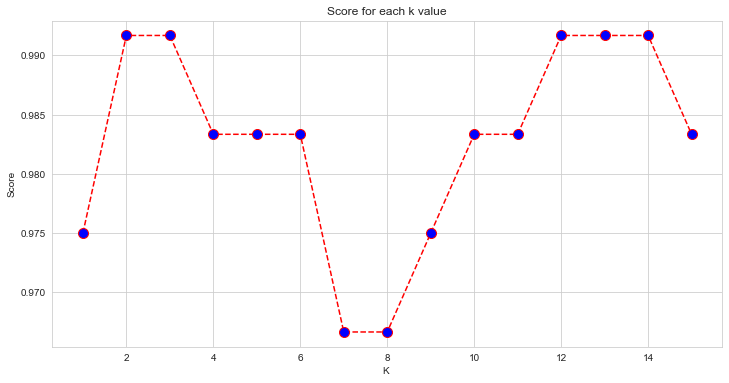

In [21]:
k_score(X_train_df, X_test_df, y_train, y_test)


C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

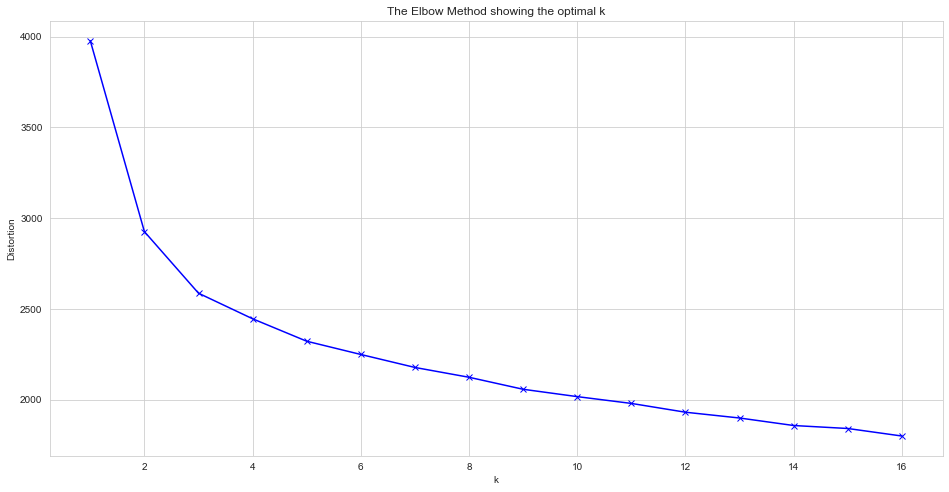

In [22]:
k_elbow(X_train_df)

In [23]:
k=13
knn=KNeighborsClassifier(n_neighbors=k)
get_model_score(knn, X_train_df, X_test_df)

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        74
         1.0       0.92      1.00      0.96        46

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

0.9666666666666667


## SVM

In [24]:
svc=SVC(kernel="linear")
get_model_score(svc, X_train_df, X_test_df)

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        74
         1.0       0.94      0.98      0.96        46

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

0.9666666666666667


## Naive Bayes

In [25]:
gnb=GaussianNB()
get_model_score(gnb,X_train_df, X_test_df)

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76        74
         1.0       0.00      0.00      0.00        46

    accuracy                           0.62       120
   macro avg       0.31      0.50      0.38       120
weighted avg       0.38      0.62      0.47       120

0.6166666666666667


C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [26]:
ln=LogisticRegression()
get_model_score(ln, X_train_df, X_test_df)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        74
         1.0       0.98      0.98      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

0.9833333333333333


### Decision tree

In [27]:
tree=DecisionTreeClassifier()
get_model_score(tree, X_train_df, X_test_df)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        74
         1.0       0.96      0.93      0.95        46

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120

0.9583333333333334



## KNN + CFS

In [28]:
knn=KNeighborsClassifier(n_neighbors=k)
get_model_score(knn, X_train_df_cfs, X_test_df_cfs)

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        74
         1.0       0.85      1.00      0.92        46

    accuracy                           0.93       120
   macro avg       0.93      0.95      0.93       120
weighted avg       0.94      0.93      0.93       120

0.9333333333333333



## SVM + CFS

In [29]:
svc = SVC(kernel="linear")
get_model_score(svc, X_train_df_cfs, X_test_df_cfs)

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        74
         1.0       0.96      1.00      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

0.9833333333333333



## Naive Bayes + CFS

In [30]:
gnb = GaussianNB()
get_model_score(gnb, X_train_df_cfs, X_test_df_cfs)

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        74
         1.0       0.88      1.00      0.94        46

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120

0.95



### Logistic Regression + CFS

In [31]:
ln = LogisticRegression()
get_model_score(ln, X_train_df_cfs, X_test_df_cfs)

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        74
         1.0       0.94      1.00      0.97        46

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

0.975



### Decision tree + CFS

In [32]:
tree = DecisionTreeClassifier()
get_model_score(tree, X_train_df_cfs, X_test_df_cfs)

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        74
         1.0       0.92      1.00      0.96        46

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

0.9666666666666667


## KNN + SFM

In [33]:
knn=KNeighborsClassifier(n_neighbors=k)
get_model_score(knn, X_train_df_rf, X_test_df_rf)

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        74
         1.0       0.96      1.00      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

0.9833333333333333


## SVM + SFM

In [34]:
svc = SVC(kernel="linear")
get_model_score(svc, X_train_df_rf, X_test_df_rf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        74
         1.0       1.00      1.00      1.00        46

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

1.0


### Naive Bayes + SFM

In [35]:
gnb = GaussianNB()
get_model_score(gnb, X_train_df_rf, X_test_df_rf)

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76        74
         1.0       0.00      0.00      0.00        46

    accuracy                           0.62       120
   macro avg       0.31      0.50      0.38       120
weighted avg       0.38      0.62      0.47       120

0.6166666666666667


C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression + SFM

In [36]:
ln = LogisticRegression()
get_model_score(ln, X_train_df_rf, X_test_df_rf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        74
         1.0       1.00      1.00      1.00        46

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

1.0


## Decision Tree + SFM

In [37]:
tree = DecisionTreeClassifier()
get_model_score(tree, X_train_df_rf, X_test_df_rf)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        74
         1.0       0.98      0.98      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

0.9833333333333333


## KNN + CFS + GridSearchCV

In [38]:
# knn_bagging=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=13), n_estimators=500)
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
X_train_df_cfs.shape    [0]
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_bagging=GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=10)
get_model_score(knn_bagging, X_train_df_cfs,X_test_df_cfs)

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        74
         1.0       0.92      1.00      0.96        46

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

0.9666666666666667


### SVM + CFS + Bagging

In [39]:

knn_bagging=BaggingClassifier(base_estimator=SVC(kernel="linear"), n_estimators=500)
get_model_score(knn_bagging, X_train_df_cfs,X_test_df_cfs)


              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        74
         1.0       0.96      1.00      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

0.9833333333333333


### Naive Bayes + CFS + Adaboost

In [47]:
ada=BaggingClassifier(base_estimator=GaussianNB(),random_state=42, n_estimators=500)
get_model_score(ada, X_train_df_cfs, X_test_df_cfs)

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        74
         1.0       0.88      1.00      0.94        46

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120

0.95


### Naive Bayes + CFS + GridSearchCV


In [41]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# create the classifier
clf = GaussianNB()

# specify the hyperparameter values to try
param_grid = {
    'priors': [None, [0.1, 0.9]],
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_df_cfs, y_train)

# print the best hyperparameters
print(grid_search.best_params_)
get_model_score(grid_search, X_train_df_cfs,X_test_df_cfs)


{'priors': None, 'var_smoothing': 1e-09}
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        74
         1.0       0.88      1.00      0.94        46

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120

0.95


### Logistic Regression + CFS + Adaboost

In [42]:
ada=AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=500)
get_model_score(ada, X_train_df_cfs, X_test_df_cfs)

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        74
         1.0       0.96      1.00      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

0.9833333333333333


### Random forest + CFS

In [43]:
rc=RandomForestClassifier(n_estimators=500)
get_model_score(rc, X_train_df_cfs, X_test_df_cfs)

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        74
         1.0       0.92      1.00      0.96        46

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

0.9666666666666667


### ANN classification ###

In [44]:
# Train the ANN
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=2707, alpha=0.0001,
                    solver='sgd', verbose=10, random_state=21, tol=0.000000001)
mlp.fit(X_train_df_cfs, y_train)

# Evaluate the trained ANN on the test set
print("Test set score: %f" % mlp.score(X_test_df_cfs, y_test))

Iteration 1, loss = 0.71944545
Iteration 2, loss = 0.71783190
Iteration 3, loss = 0.71537180
Iteration 4, loss = 0.71219655
Iteration 5, loss = 0.70839023
Iteration 6, loss = 0.70436936
Iteration 7, loss = 0.69989199
Iteration 8, loss = 0.69524736
Iteration 9, loss = 0.69032815
Iteration 10, loss = 0.68550968
Iteration 11, loss = 0.68046015
Iteration 12, loss = 0.67553232
Iteration 13, loss = 0.67052117
Iteration 14, loss = 0.66557952
Iteration 15, loss = 0.66075280
Iteration 16, loss = 0.65600848
Iteration 17, loss = 0.65116731
Iteration 18, loss = 0.64656092
Iteration 19, loss = 0.64191163
Iteration 20, loss = 0.63734720
Iteration 21, loss = 0.63292321
Iteration 22, loss = 0.62851484
Iteration 23, loss = 0.62424052
Iteration 24, loss = 0.62011835
Iteration 25, loss = 0.61589884
Iteration 26, loss = 0.61182497
Iteration 27, loss = 0.60779461
Iteration 28, loss = 0.60381087
Iteration 29, loss = 0.59988306
Iteration 30, loss = 0.59603085
Iteration 31, loss = 0.59215733
Iteration 32, los

In [45]:
y_pred_mlp = mlp.predict(X_test_df_cfs)
print(classification_report(y_pred_mlp, y_test))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        72
         1.0       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

